In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shap
import seaborn as sns
%matplotlib inline

In [2]:
X,y = shap.datasets.boston()

In [3]:
X100=shap.utils.sample(X,100)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [4]:
for i in range(X.shape[1]):
    print(X.columns[i],'=',model.coef_[i].round(4))

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


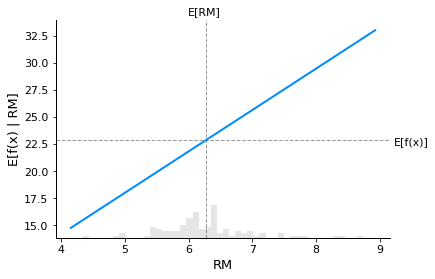

In [5]:
shap.plots.partial_dependence(
   'RM',model.predict,X100,ice=False,model_expected_value=True,feature_expected_value=True)

In [6]:
explainer= shap.Explainer(model.predict,X100)

In [7]:
explainer
shap_values=explainer(X)

Permutation explainer: 507it [00:31, 15.18it/s]                                                                        


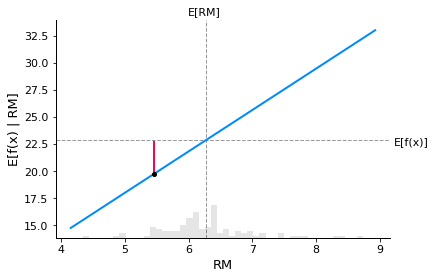

In [8]:
sample_id=18
shap.partial_dependence_plot(
  'RM',model.predict,X100,model_expected_value=True, feature_expected_value=True,
 ice=False, shap_values=shap_values[sample_id:sample_id+1,:])

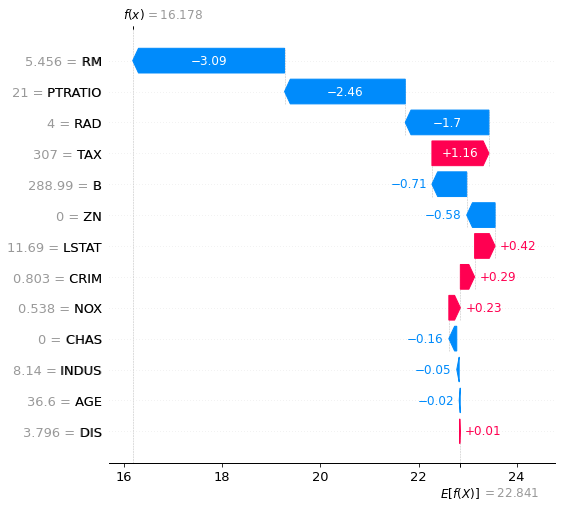

In [9]:
shap.plots.waterfall(shap_values[sample_id],max_display=14)

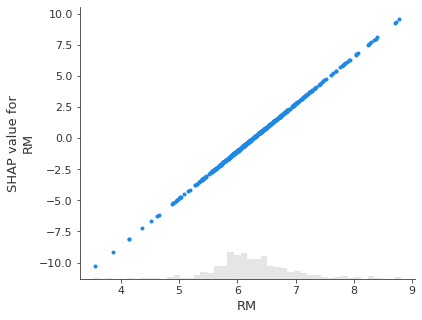

In [11]:
shap.plots.scatter(shap_values[:,'RM'])

In [13]:
!pip install interpret

  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=c5635e8885b2858b284c14c5f45c2eb537a8cd641dfdf24e25625dab110589cb
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\56\e4\21\8a1190a7c31f3aa3f8834b05126ded8bf105b8fd11fad1806e
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=0fcb710b60571ac222a9c6d3bb184b9a76552e9cff579380d049c80aad861309
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\08\ae\6a\0f4a0ee8fa216ebf1f2e57277693a20d80e8a2cfe549f66d86
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=dfa7454c1cb84b0a67b48ae8c8421b44d5dc71236d08ea54d342bf72291c1756
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\12\fe\5a\d0f2f657ee34cef5cc3fced1d8992994fac1ca6232a03c6c03
  Created wheel for dash-table: filename=dash_table-4.12.0-py3-none-any.whl size=1837674 sha256=040e4ba4

In [14]:
import interpret.glassbox 

In [15]:
model_ebm=interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X,y)

ExplainableBoostingRegressor(feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                            'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT',
                                            'DIS x LSTAT', 'DIS x B',
                                            'CRIM x LSTAT', 'RM x TAX',
                                            'AGE x LSTAT', 'NOX x RM',
                                            'RM x RAD', 'NOX x LSTAT',
                                            'INDUS x LSTAT', 'CRIM x RM'],
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'categorical',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'contin

In [17]:
explainer_ebm= shap.Explainer(model_ebm.predict,X100)
shap_values_ebm=explainer_ebm(X)

Permutation explainer: 507it [01:11,  6.10it/s]                                                                        


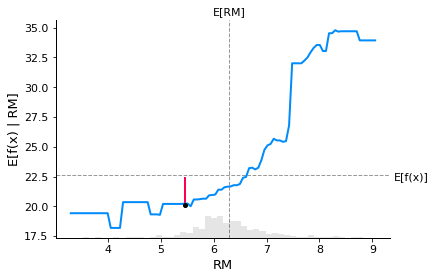

In [21]:
fig,ax=shap.partial_dependence_plot(
             'RM',model_ebm.predict,X,model_expected_value=True,
            feature_expected_value=True,show=False,ice=False,shap_values=shap_values_ebm[sample_id:sample_id+1,:])

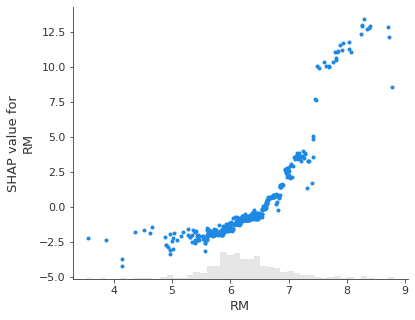

In [22]:
shap.plots.scatter(shap_values_ebm[:,'RM'])

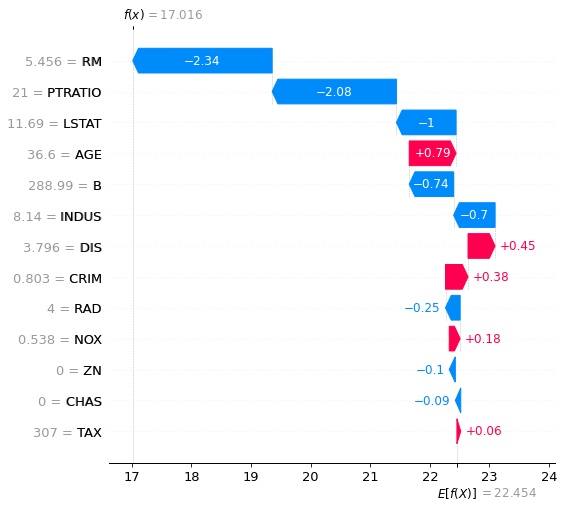

In [23]:
shap.plots.waterfall(shap_values_ebm[sample_id],max_display=14)

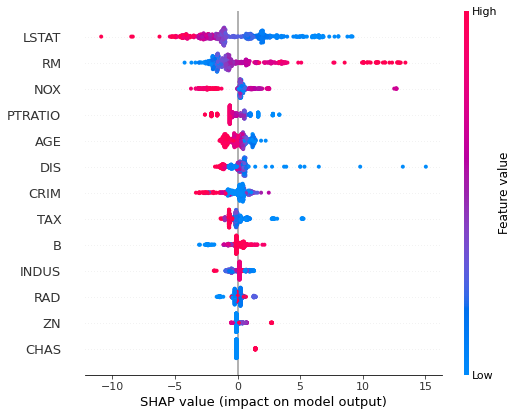

In [25]:
shap.plots.beeswarm(shap_values_ebm,max_display=14)